In [86]:
from IPython.core.display import HTML,display
display(HTML("<style>.container { width:90% !important }</style>"))

# load required libaries

# basics
import numpy as np
import pandas as pd

#graphics
import seaborn as sns
import matplotlib.pyplot as plt

#metrics to measure effectiveness of models
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, r2_score

# polynominal selection
from sklearn.preprocessing import PolynomialFeatures 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs

# polynomial graphics
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

#data transformation
#from scipy import stats
from sklearn.preprocessing import StandardScaler

#model prep
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# fine tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## need to use pipelines
from sklearn.pipeline import Pipeline


#model prep
from sklearn.model_selection import ParameterGrid

#models

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [87]:
originalData= pd.read_csv("concrete.csv")
originalData.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [88]:
originalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Prepare Data

In [89]:
#drop duplicates
print(originalData.shape)
print(originalData.duplicated().sum())
originalData = originalData.drop_duplicates()
print(originalData.shape)

(1030, 9)
25
(1005, 9)


In [90]:
#log age column
originalData["age"] = np.log(originalData["age"])
originalData.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,3.168492,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,1.189466,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,0.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,1.945910,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,3.332205,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,4.025352,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,5.899897,82.600000


In [91]:
# Standard scaler
scaler = StandardScaler()
transformedData = pd.DataFrame(scaler.fit_transform(originalData), columns=originalData.columns)
transformedData.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03,1.005000e+03
mean,-1.838220e-16,-1.674724e-16,-3.031296e-16,-7.800283e-16,1.047255e-16,1.174737e-15,1.581930e-16,2.341963e-16,-2.076835e-16
std,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00,1.000498e+00
min,-1.693618e+00,-8.364707e-01,-8.653750e-01,-2.826018e+00,-1.019640e+00,-2.235936e+00,-2.225246e+00,-2.665121e+00,-2.022545e+00
25%,-8.431237e-01,-8.364707e-01,-8.653750e-01,-7.255629e-01,-1.019640e+00,-5.465081e-01,-6.025901e-01,-1.028353e+00,-7.206848e-01
50%,-1.307032e-01,-6.042579e-01,-8.653750e-01,1.699435e-01,1.128375e-02,-8.223793e-02,9.105479e-02,1.377036e-01,-8.910756e-02
75%,6.747251e-01,8.180450e-01,9.779928e-01,5.075166e-01,6.703992e-01,7.302348e-01,6.165811e-01,7.207321e-01,5.910052e-01
max,2.506116e+00,3.336392e+00,2.252612e+00,3.044003e+00,4.422287e+00,2.200424e+00,2.738611e+00,2.297473e+00,2.909041e+00


In [92]:
transformedData.skew()

cement          0.564959
slag            0.855225
ash             0.497231
water           0.034433
superplastic    0.980604
coarseagg      -0.065256
fineagg        -0.252353
age            -0.142556
strength        0.395696
dtype: float64

In [93]:
## looks good!

In [94]:
## outliers?
from sklearn.neighbors import LocalOutlierFactor

outlierDetector = LocalOutlierFactor()
outliers = outlierDetector.fit_predict(data)
len(data)

987

In [95]:
outlierCount = (outliers == -1).sum()
outlierCount

1

In [96]:
data["outlier"] = outliers
data = data[data["outlier"] == 1]
data.shape

(986, 10)

# Kmeans clustering

In [97]:
parameters = {'n_clusters' : [2,3,4,5,6,7,8,9,10,11,15,20,30] }

parameter_grid = ParameterGrid(parameters)

In [98]:
cluster_errors = []

model = KMeans(random_state=88)

for row in parameter_grid:
    model.set_params(**row)
    model.fit(originalData)

    #labels = model.labels_
    #centroids = model.cluster_centers_
    #print(centroids)
    cluster_errors.append(model.inertia_)

clusterResults = pd.DataFrame({"num_clusters": [2,3,4,5,6,7,8,9,10,11,15,20,30]  , "cluster_errors": cluster_errors})
clusterResults[0:15]

,num_clusters,cluster_errors
0,2,2.677856e+07
1,3,2.022860e+07
2,4,1.762158e+07
3,5,1.562717e+07
4,6,1.400518e+07
5,7,1.266475e+07
6,8,1.149059e+07
7,9,1.044052e+07
8,10,9.637503e+06
9,11,8.802933e+06


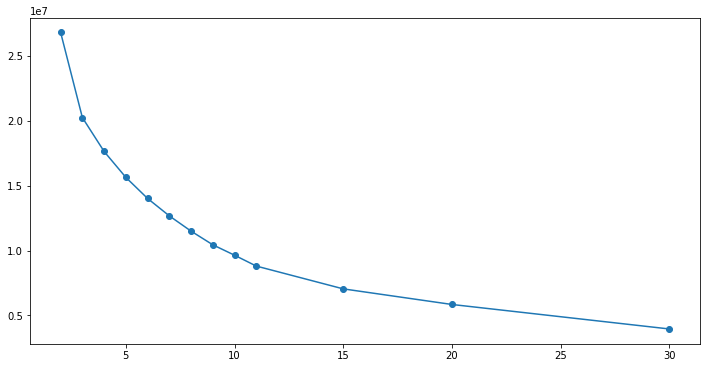

In [99]:
plt.figure(figsize=(12,6))
plt.plot( clusterResults.num_clusters, clusterResults.cluster_errors, marker = "o" )

In [100]:
kmeans = KMeans(n_clusters=900,  random_state=88)
kmeans.fit(transformedData)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=900, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=88, tol=0.0001, verbose=0)

In [101]:
#scoring 
from sklearn.metrics import silhouette_score

ss = silhouette_score(transformedData, model.labels_)
ss

0.14362630455881073

In [79]:
# common functions 

# Create Indivdual results matrices - will be used for results comparisson.
def CreateResultMatrix(name, classifier, xtrain, ytrain,xtest,ytest,ypredict,mean,std):
    trainingScore = classifier.score(xtrain,ytrain)
    validationScore = classifier.score(xtest, ytest)
    overfit = validationScore -  trainingScore
    resultsframe = pd.DataFrame({'Algorithm':[name],
                                 "Training Accuracy": trainingScore, 
                                 "Validation Accuracy":validationScore,
                                 "Overfit By (-ve bad)" : overfit,
                                 "R2 Score" : r2_score(ytest,ypredict),
                                 "KFold mean %" : mean * 100,
                                 "Kfold std %" : std*100,
                                 "fold min" : (mean *100) - (3 * std *100),
                                 "fold max" : (mean *100) + (3 * std *100)
                                })
    return resultsframe;


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [89]:
data.shape

(1030, 9)

 ## remove duplicates

In [90]:
data.duplicated().sum()

25

In [91]:
data = data.drop_duplicates()

In [92]:
data.shape

(1005, 9)

## Outliers

In [93]:
from sklearn.neighbors import LocalOutlierFactor

outlierDetector = LocalOutlierFactor()
outliers = outlierDetector.fit_predict(data)
len(data)

1005

In [94]:
outlierCount = (outliers == -1).sum()
outlierCount

16

In [95]:
data["outlier"] = outliers
data = data[data["outlier"] == 1]
data.shape

(989, 10)

In [96]:
## outliers dropped

In [97]:
data["age"] = np.log(data["age"])
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,outlier
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.332205,29.89,1
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.639057,23.51,1
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.332205,29.22,1
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.332205,18.29,1
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,3.332205,13.29,1
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,1.098612,41.30,1
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,3.332205,44.28,1
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,5.598422,55.06,1


In [98]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,outlier
count,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.0
mean,278.455511,72.750051,55.218301,182.128615,6.019414,973.410415,773.470677,3.158751,35.191921,1.0
std,103.871243,86.243347,63.921003,21.437036,5.905803,77.415736,80.178746,1.186533,16.166993,0.0
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,0.000000,2.330000,1.0
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,730.400000,1.945910,23.520000,1.0
50%,264.500000,20.000000,0.000000,185.700000,6.000000,968.000000,780.000000,3.332205,33.760000,1.0
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1029.400000,824.000000,4.025352,44.860000,1.0
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,5.899897,82.600000,1.0


In [99]:
x = data.drop(['strength','outlier'], axis = 1)
y = data['strength']


#scale
scaler = StandardScaler()
x_train = scaler.fit_transform(x)

x_rest, x_test, y_rest, y_test = train_test_split(x, y, test_size=0.30, random_state=88)

In [100]:
#training and validation split based upon x_rest created above
x_train, x_valid, y_train, y_valid = train_test_split(x_rest, y_rest, test_size=0.30, random_state=88)


# fit and predict
linR = LinearRegression()
linR.fit(x_train, y_train)
y_predict =linR.predict(x_valid)

#results
rawResult = CreateResultMatrix("No feature selection", linR, x_train, y_train, x_valid, y_valid, y_predict,0 ,0)    
rawResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,No feature selection,0.837726,0.80163,-0.036096,0.80163,0,0,0,0


In [101]:
feat= [6,7,8,9,10,11,12]
degree = [2,3]

linR = LinearRegression()
scaler = StandardScaler()

tuningMatrix = pd.DataFrame()

# try different polynomial degrees
for deg in degree:
    #create explantory matrix
    poly = PolynomialFeatures(degree = deg, interaction_only=False) 
    xPoly = poly.fit_transform(x_rest)
    
    #create validation and training sets
    x_train, x_valid, y_train, y_valid = train_test_split(xPoly, y_rest, test_size=0.30, random_state=88)

    #try diferent feature numbers
    for feature in feat:
        
        sfs1 = sfs(linR, k_features=feature, forward=True, scoring='r2', cv=10)
        sfs1 = sfs1.fit(x_train, y_train)
              
        featuresUsed = sfs1.k_feature_idx_
   
        linR.fit(x_train[:,featuresUsed], y_train)
        y_predict =linR.predict(x_valid[:,featuresUsed])
        
        trainingScore = linR.score(x_train[:,featuresUsed],y_train)
        validationScore = linR.score(x_valid[:,featuresUsed], y_valid)
        overfit = validationScore -  trainingScore
        
        tuningMatrix= tuningMatrix.append(pd.Series({"Degree ":deg, " Features ": feature, "R2": sfs1.k_score_,"Overfit":overfit,"featuresUsed":sfs1.k_feature_names_}), ignore_index=True)

tuningMatrix.sort_values(by="R2", ascending=False)

,Features,Degree,Overfit,R2,featuresUsed
6,12.0,2.0,-0.032734,0.848929,"(1, 5, 10, 16, 23, 29, 30, 34, 35, 36, 38, 43)"
13,12.0,3.0,-0.030146,0.845978,"(1, 46, 65, 79, 84, 107, 114, 119, 126, 140, 1..."
5,11.0,2.0,-0.033026,0.845371,"(1, 5, 10, 16, 23, 29, 30, 35, 36, 38, 43)"
12,11.0,3.0,-0.025011,0.842864,"(1, 46, 65, 79, 84, 107, 114, 126, 140, 156, 159)"
4,10.0,2.0,-0.034983,0.842734,"(1, 10, 16, 23, 29, 30, 35, 36, 38, 43)"
11,10.0,3.0,-0.025551,0.841819,"(1, 46, 65, 79, 107, 114, 126, 140, 156, 159)"
10,9.0,3.0,-0.029652,0.840149,"(1, 46, 65, 79, 107, 126, 140, 156, 159)"
3,9.0,2.0,-0.040437,0.835385,"(1, 10, 16, 23, 29, 30, 35, 38, 43)"
9,8.0,3.0,-0.021018,0.835192,"(1, 46, 65, 79, 107, 140, 156, 159)"
2,8.0,2.0,-0.044990,0.830400,"(1, 10, 16, 23, 29, 30, 38, 43)"


In [102]:
## build for real

poly = PolynomialFeatures(degree = 3, interaction_only=False)
xPoly = poly.fit_transform(x_rest)
xPoly.shape

(692, 165)

In [104]:
x_train, x_valid, y_train, y_valid = train_test_split(xPoly, y_rest, test_size=0.30, random_state=88)

In [108]:
linR = LinearRegression()

sfs1 = sfs(linR, k_features=11, forward=True, scoring='r2', cv=11)
sfs1 = sfs1.fit(x_train, y_train)

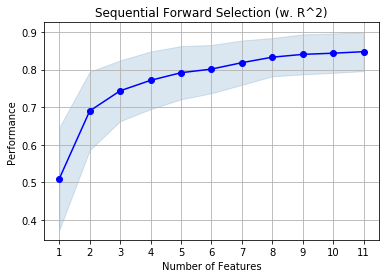

In [109]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [110]:
display(["Feature Count", 11])
display(["Average Score",sfs1.k_score_])
display(["Features Used",sfs1.k_feature_names_])

['Feature Count', 11]

['Average Score', 0.8476893672503756]

['Features Used',
 ('1', '46', '47', '65', '79', '107', '119', '125', '140', '143', '159')]

In [111]:
trainingFeatures = pd.DataFrame(x_train[:,sfs1.k_feature_idx_])

validationFeatures = pd.DataFrame(x_valid[:,sfs1.k_feature_idx_])

In [112]:
## validate existing result

In [113]:
linR.fit(validationFeatures, y_valid)

y_predict =linR.predict(validationFeatures)
        
trainingScore = linR.score(trainingFeatures,y_train)
#trainingScore = linR.score(validationFeatures,y_train)
validationScore = linR.score(validationFeatures, y_valid)
overfit = validationScore -  trainingScore

#results
autoSelectionResult = CreateResultMatrix("Auto Feature Selection", linR, trainingFeatures, y_train, validationFeatures, y_valid, y_predict, 0, 0)    
autoSelectionResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Auto Feature Selection,0.854078,0.845112,-0.008965,0.845112,0,0,0,0


In [114]:
featureSelectionResult = pd.concat([autoSelectionResult,rawResult])
featureSelectionResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Auto Feature Selection,0.854078,0.845112,-0.008965,0.845112,0,0,0,0
0,No feature selection,0.837726,0.801630,-0.036096,0.801630,0,0,0,0


In [115]:
print("cement, slag, ash, water, superplastic, coarseagg, fineagg")
print()
featuresUsed = sfs1.get_metric_dict()[11]["feature_idx"]
for feature in featuresUsed:
    print(feature, " ",poly.powers_[feature])

cement, slag, ash, water, superplastic, coarseagg, fineagg

1   [1 0 0 0 0 0 0 0]
46   [2 1 0 0 0 0 0 0]
47   [2 0 1 0 0 0 0 0]
65   [1 0 1 0 0 0 0 1]
79   [1 0 0 0 0 0 1 1]
107   [0 1 0 0 0 0 1 1]
119   [0 0 1 1 0 0 0 1]
125   [0 0 1 0 0 1 1 0]
140   [0 0 0 1 0 1 1 0]
143   [0 0 0 1 0 0 1 1]
159   [0 0 0 0 0 1 1 1]


In [117]:
kfold = KFold(n_splits=10, random_state=88,shuffle=True)
kfold

KFold(n_splits=10, random_state=88, shuffle=True)

In [118]:
## linear regression

In [119]:
LinRegression = LinearRegression()
LinRegression.fit(trainingFeatures, y_train)
y_predict =LinRegression.predict(validationFeatures)

results = cross_val_score(LinRegression, trainingFeatures, y_train, cv=kfold, scoring='r2')
print(results)

[0.83424733 0.84798747 0.83790136 0.88540159 0.85882336 0.86616282
 0.93169126 0.82256792 0.83152686 0.88493382]


In [120]:
lrResult = CreateResultMatrix("Linear Regression", LinRegression, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())
lrResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Linear Regression,0.867505,0.832609,-0.034896,0.832609,86.012438,3.154919,76.54768,95.477196


In [121]:
##ridge

In [122]:
ridge = Ridge(random_state=88)
ridge.fit(trainingFeatures, y_train)
results = cross_val_score(ridge, trainingFeatures, y_train, cv=kfold, scoring='r2')

y_predict =ridge.predict(validationFeatures)

ridgeResult = CreateResultMatrix("Ridge Regression", ridge, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())
ridgeResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Ridge Regression,0.867505,0.832609,-0.034896,0.832609,86.012438,3.154919,76.547682,95.477195


In [123]:
## lasso

In [124]:
lasso = Lasso(random_state=88, max_iter=2200)
lasso.fit(trainingFeatures, y_train)

results = cross_val_score(lasso, trainingFeatures, y_train, cv=kfold, scoring='r2')

y_predict =lasso.predict(validationFeatures)

lassoResult = CreateResultMatrix("Lasso Regression", lasso, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())
lassoResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Lasso Regression,0.867501,0.832536,-0.034965,0.832536,86.012181,3.153252,76.552426,95.471937


In [ ]:
## svm

In [126]:
from sklearn import svm

svreg = svm.SVR()

In [127]:
svreg.fit(trainingFeatures, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [128]:
results = cross_val_score(svreg, trainingFeatures, y_train, cv=kfold, scoring='r2')
results.mean()

y_predict =svreg.predict(validationFeatures)

svrResult = CreateResultMatrix("SVM Regression", svreg, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())
svrResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,SVM Regression,0.219291,0.218062,-0.001229,0.218062,19.397288,2.784031,11.045196,27.74938


In [ ]:
# neighbour

In [129]:
neigh = KNeighborsRegressor()
neigh.fit(trainingFeatures, y_train)

results = cross_val_score(neigh, trainingFeatures, y_train, cv=kfold, scoring='r2')

y_predict =neigh.predict(validationFeatures)


neighResult = CreateResultMatrix("KNNeighbour", neigh, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())
neighResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,KNNeighbour,0.703448,0.579067,-0.12438,0.579067,51.045842,11.918407,15.29062,86.801064


In [ ]:
# grad boost

In [130]:
gradBoost = GradientBoostingRegressor()
gradBoost.fit(trainingFeatures, y_train)

results = cross_val_score(gradBoost, trainingFeatures, y_train, cv=kfold, scoring='r2')

y_predict =gradBoost.predict(validationFeatures)


gradResult = CreateResultMatrix("Gradent Boosting", gradBoost, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())
gradResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Gradent Boosting,0.960351,0.905544,-0.054807,0.905544,87.449911,2.133968,81.048006,93.851815


In [131]:
## ada boost

In [132]:
adaboost = AdaBoostRegressor()
adaboost.fit(trainingFeatures, y_train)

results = cross_val_score(adaboost, trainingFeatures, y_train, cv=kfold, scoring='r2')

y_predict =adaboost.predict(validationFeatures)


adaResult = CreateResultMatrix("Ada Boost", adaboost, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())
adaResult

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Ada Boost,0.856395,0.834425,-0.021969,0.834425,80.125328,3.447175,69.783803,90.466853


In [133]:
algorithmResults = pd.concat([neighResult,ridgeResult,svrResult,lassoResult,lrResult,featureSelectionResult,gradResult,adaResult])
algorithmResults.sort_values(by="R2 Score", ascending=False)

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Gradent Boosting,0.960351,0.905544,-0.054807,0.905544,87.449911,2.133968,81.048006,93.851815
0,Auto Feature Selection,0.854078,0.845112,-0.008965,0.845112,0.000000,0.000000,0.000000,0.000000
0,Ada Boost,0.856395,0.834425,-0.021969,0.834425,80.125328,3.447175,69.783803,90.466853
0,Linear Regression,0.867505,0.832609,-0.034896,0.832609,86.012438,3.154919,76.547680,95.477196
0,Ridge Regression,0.867505,0.832609,-0.034896,0.832609,86.012438,3.154919,76.547682,95.477195
0,Lasso Regression,0.867501,0.832536,-0.034965,0.832536,86.012181,3.153252,76.552426,95.471937
0,No feature selection,0.837726,0.801630,-0.036096,0.801630,0.000000,0.000000,0.000000,0.000000
0,KNNeighbour,0.703448,0.579067,-0.124380,0.579067,51.045842,11.918407,15.290620,86.801064
0,SVM Regression,0.219291,0.218062,-0.001229,0.218062,19.397288,2.784031,11.045196,27.749380


In [ ]:
## tuning

In [134]:
param_grid = { "n_neighbors" : [1,2,3,4,5,6,7,8,9,10,11,12], "p" : [1,2]}
neigh = KNeighborsRegressor()

rs = RandomizedSearchCV(neigh,param_grid)
rs.fit(validationFeatures, y_valid)
rs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                    weights='uniform')

In [135]:
neighTuned = rs.best_estimator_
neighTuned.fit(validationFeatures, y_valid)

results = cross_val_score(neighTuned, validationFeatures, y_valid, scoring='r2') #cv=kfold,
print(results)

y_predict =neighTuned.predict(validationFeatures)


neighTunedResult = CreateResultMatrix("KNNeighbourTunedGrid", neighTuned, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())

[0.43073528 0.34344551 0.67648009 0.52279644 0.64389485]


In [136]:
neigh = pd.concat([neighTunedResult,neighResult])
neigh

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,KNNeighbourTunedGrid,0.478273,0.756007,0.277734,0.756007,52.347043,12.563696,14.655955,90.038132
0,KNNeighbour,0.703448,0.579067,-0.124380,0.579067,51.045842,11.918407,15.290620,86.801064


In [137]:
## svm tuning

In [138]:
#svr
param_grid = {'C': [0.1,0.25,0.5,0.75,0.9,0.99, 1,1.1,1.5,1.75,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,10,25,50,100,150,200,225,250,275,300]
              ,'epsilon':[0.1,0.25,0.5,0.75,0.9,0.99]
              ,"gamma" : ['scale', 'auto'], "tol" :[0.001,0.01,0.1,0.25,0.5,0.75,0.9,0.99,1,2]
              , "shrinking" :[True, False]}

In [139]:
from sklearn import svm

svr = svm.SVR()

In [140]:
rs = RandomizedSearchCV(svr,param_grid)
rs.fit(validationFeatures, y_valid)
rs.best_estimator_

SVR(C=25, cache_size=200, coef0=0.0, degree=3, epsilon=0.99, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=False, tol=0.01, verbose=False)

In [141]:
svrTuned = rs.best_estimator_
svrTuned.fit(validationFeatures, y_valid)

results = cross_val_score(svrTuned, validationFeatures, y_valid, cv=kfold, scoring='r2')

display([results,results.mean()])

y_predict =svrTuned.predict(validationFeatures)


svrTunedResult = CreateResultMatrix("SVM Tuned Regression", svrTuned, trainingFeatures, y_train,validationFeatures, y_valid, y_predict,results.mean(),results.std())

[array([ 0.26895395,  0.51906582,  0.27898886,  0.53672062,  0.46615034,
         0.43095236, -0.18506503,  0.39518988,  0.51126737,  0.36187377]),
 0.3584097954469337]

In [142]:
svm= pd.concat([svrTunedResult,svrResult])
svm

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,SVM Tuned Regression,0.382086,0.420721,0.038635,0.420721,35.840980,20.220798,-24.821416,96.503375
0,SVM Regression,0.219291,0.218062,-0.001229,0.218062,19.397288,2.784031,11.045196,27.749380


In [ ]:
# lasso

In [143]:
param_grid = { 
                "alpha" : [0.01,0.1,0.25,0.5,0.75,0.9,0.99]
                ,"fit_intercept": [True,False]
                ,"tol":[0.01,0.1,1,5,10]
                , "positive" : [True, False]
             }

In [144]:
lasso = Lasso(random_state=88,max_iter= 2200)

In [145]:
rs = RandomizedSearchCV(lasso,param_grid)
rs.fit(validationFeatures, y_valid)
rs.best_estimator_

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=2200,
      normalize=False, positive=True, precompute=False, random_state=88,
      selection='cyclic', tol=0.01, warm_start=False)

In [146]:
lassoTuned = rs.best_estimator_ 
lassoTuned.fit(trainingFeatures, y_train)


results = cross_val_score(lassoTuned, trainingFeatures, y_train, cv=kfold, scoring='r2')
display([results,results.mean()])



y_predict =lassoTuned.predict(validationFeatures)

lassoTunedResult = CreateResultMatrix("Lasso Regression Tuned", lassoTuned
                                      , trainingFeatures, y_train
                                      ,validationFeatures, y_valid
                                      , y_predict,results.mean(),results.std())

[array([0.78850726, 0.81971557, 0.83686974, 0.84740393, 0.83472961,
        0.82659649, 0.90165054, 0.78813576, 0.83063134, 0.86791918]),
 0.834215941312574]

In [147]:
lasso= pd.concat([lassoResult,lassoTunedResult])
lasso

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Lasso Regression,0.867501,0.832536,-0.034965,0.832536,86.012181,3.153252,76.552426,95.471937
0,Lasso Regression Tuned,0.840576,0.810517,-0.030059,0.810517,83.421594,3.218446,73.766256,93.076933


In [148]:
#ridge

In [149]:
param_grid = { 
                "alpha" : [0.01,0.1,0.25,0.5,0.75,0.9,1,5]
               , "solver" : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
             }

In [150]:
ridge = Ridge(random_state=88)

In [151]:
rs = RandomizedSearchCV(ridge,param_grid)
rs.fit(validationFeatures, y_valid)
rs.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=88, solver='auto', tol=0.001)

In [152]:
ridgeTuned = rs.best_estimator_
ridgeTuned.fit(validationFeatures, y_valid)

results = cross_val_score(ridgeTuned, validationFeatures, y_valid, cv=kfold, scoring='r2')

y_predict =ridgeTuned.predict(validationFeatures)

ridgeTunedResult = CreateResultMatrix("Ridge Regression Tuned", ridgeTuned
                                      , trainingFeatures, y_train
                                      ,validationFeatures, y_valid
                                      , y_predict,results.mean(),results.std())

ridge = pd.concat([ridgeTunedResult,ridgeResult])
ridge

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Ridge Regression Tuned,0.854078,0.845112,-0.008965,0.845112,81.817036,5.574620,65.093176,98.540896
0,Ridge Regression,0.867505,0.832609,-0.034896,0.832609,86.012438,3.154919,76.547682,95.477195


In [ ]:
## GradientBoostingRegressor(random_state=88)

In [153]:
param_grid = { 
                "loss" : ['ls', 'lad', 'huber', 'quantile']
                , "learning_rate" : [0.05,0.1,0.15,0.2]
                , "n_estimators" : [75,100,125]
}

In [154]:
gradBoostTuned = GradientBoostingRegressor(random_state=88)

In [155]:
rs = RandomizedSearchCV(gradBoostTuned,param_grid)
rs.fit(validationFeatures, y_valid)
rs.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=75,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=88, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [156]:
gradBoostTuned = rs.best_estimator_
gradBoostTuned.fit(validationFeatures, y_valid)


results = cross_val_score(gradBoostTuned, validationFeatures, y_valid, cv=kfold, scoring='r2')

y_predict =ridgeTuned.predict(validationFeatures)
gradTunedResult = CreateResultMatrix("Grad Boosted Tuned", gradBoostTuned
                                      , trainingFeatures, y_train
                                      ,validationFeatures, y_valid
                                      , y_predict,results.mean(),results.std())

grad = pd.concat([gradTunedResult,gradResult])
grad

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Grad Boosted Tuned,0.847251,0.992538,0.145287,0.845112,83.258847,5.369322,67.150881,99.366813
0,Gradent Boosting,0.960351,0.905544,-0.054807,0.905544,87.449911,2.133968,81.048006,93.851815


In [ ]:
## ada boosting

In [157]:
param_grid = { 
                "n_estimators" : [750,1000,1250,1500]
               , "learning_rate" : [0.05,0.1,0.15,0.2]
                , "loss" : ['linear', 'square', 'exponential']
             }

In [158]:
adaboost = AdaBoostRegressor(random_state=88)

In [159]:
rs = RandomizedSearchCV(adaboost,param_grid)
rs.fit(validationFeatures, y_valid)
rs.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
                  n_estimators=1000, random_state=88)

In [160]:
adaTuned = rs.best_estimator_

adaTuned.fit(validationFeatures, y_valid)


results = cross_val_score(adaTuned, validationFeatures, y_valid, cv=kfold, scoring='r2')

y_predict =ridgeTuned.predict(validationFeatures)
adaTunedResult = CreateResultMatrix("Ada Tuned", adaTuned
                                      , trainingFeatures, y_train
                                      ,validationFeatures, y_valid
                                      , y_predict,results.mean(),results.std())

ada = pd.concat([adaTunedResult,adaResult])
ada

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Ada Tuned,0.805802,0.899178,0.093375,0.845112,79.427603,6.468991,60.020629,98.834577
0,Ada Boost,0.856395,0.834425,-0.021969,0.834425,80.125328,3.447175,69.783803,90.466853


In [161]:
## conclusions

In [162]:
tuned= pd.concat([neigh,svm, ridge, lasso, ada, grad])
tuned.sort_values(by="R2 Score", ascending=False)

,Algorithm,Training Accuracy,Validation Accuracy,Overfit By (-ve bad),R2 Score,KFold mean %,Kfold std %,fold min,fold max
0,Gradent Boosting,0.960351,0.905544,-0.054807,0.905544,87.449911,2.133968,81.048006,93.851815
0,Ridge Regression Tuned,0.854078,0.845112,-0.008965,0.845112,81.817036,5.574620,65.093176,98.540896
0,Ada Tuned,0.805802,0.899178,0.093375,0.845112,79.427603,6.468991,60.020629,98.834577
0,Grad Boosted Tuned,0.847251,0.992538,0.145287,0.845112,83.258847,5.369322,67.150881,99.366813
0,Ada Boost,0.856395,0.834425,-0.021969,0.834425,80.125328,3.447175,69.783803,90.466853
0,Ridge Regression,0.867505,0.832609,-0.034896,0.832609,86.012438,3.154919,76.547682,95.477195
0,Lasso Regression,0.867501,0.832536,-0.034965,0.832536,86.012181,3.153252,76.552426,95.471937
0,Lasso Regression Tuned,0.840576,0.810517,-0.030059,0.810517,83.421594,3.218446,73.766256,93.076933
0,KNNeighbourTunedGrid,0.478273,0.756007,0.277734,0.756007,52.347043,12.563696,14.655955,90.038132
0,KNNeighbour,0.703448,0.579067,-0.124380,0.579067,51.045842,11.918407,15.290620,86.801064


In [ ]:
## final test

In [167]:
poly = PolynomialFeatures(degree = 3, interaction_only=False) 
xPoly = poly.fit_transform(x_test)

df = pd.DataFrame(data=xPoly)
rows = [1, 46, 65, 79, 84, 107, 114, 126, 140, 156, 159]
testFeatures = df.loc[:,rows]

In [169]:
gradBoostTuned.fit(testFeatures, y_test)
y_predict =gradBoostTuned.predict(testFeatures)
gradBoostTuned.score(testFeatures, y_test)

0.9819801933594109

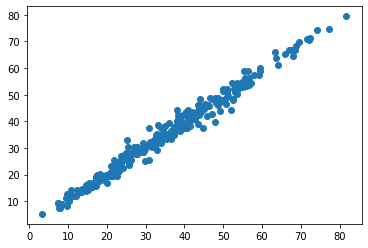

In [170]:
plt.scatter(y_test, y_predict)